Projet 5 - Segmentez des clients d'un site e-commerce - Prediction 1
# 1. Initialisation

>>-
## 11. Package imports

In [1]:
import numpy as np              # fast thus always used
import pandas as pd             # fast
pd.set_option("display.max_rows", 20, "display.max_columns", None)
import matplotlib.pyplot as plt # slow: 233 ns
import seaborn as sns           # SLOW BUT: 80.4 ns
cmaps = ['vlag', 'twilight_shifted', 'RdBu_r', 'coolwarm', 'seismic', 'rainbow', 'Greys_r']
import re
import my
import math
import timeit
from scipy import interpolate   # FAST BUT: 319 ns ± 2.64 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
#  %timeit import geopandas     # SLOW 
#import os
#import sys
from IPython.display import clear_output
import warnings

>>-
## 12. Data imports

In [2]:
df = pd.read_csv('dfs_1.csv') #, sep='\t')
try:
    df = df.drop('Unnamed: 0', axis=1)
    print("C'est bon j'ai supprimé la colonne 'Unnamed: 0' qui ne devrait pas exister.")
except:
    print("Y'avait pas de colonne 'Unnamed: 0'")

Y'avait pas de colonne 'Unnamed: 0'


In [3]:
dfl = pd.read_csv('dfs_log.csv') #, sep='\t')
try:
    dfl = dfl.drop('Unnamed: 0', axis=1)
    print("C'est bon j'ai supprimé la colonne 'Unnamed: 0' qui ne devrait pas exister.")
except:
    print("Y'avait pas de colonne 'Unnamed: 0'")

C'est bon j'ai supprimé la colonne 'Unnamed: 0' qui ne devrait pas exister.


In [4]:
dfllll = pd.read_csv('dfs_loglogloglog.csv') #, sep='\t')
try:
    dfllll = dfllll.drop('Unnamed: 0', axis=1)
    print("C'est bon j'ai supprimé la colonne 'Unnamed: 0' qui ne devrait pas exister.")
except:
    print("Y'avait pas de colonne 'Unnamed: 0'")

C'est bon j'ai supprimé la colonne 'Unnamed: 0' qui ne devrait pas exister.


>>-
## 13. Fonctions de plot

In [5]:
cmaps = ['vlag', 'twilight_shifted', 'RdBu_r', 'coolwarm', 'seismic', 'rainbow']

In [6]:
def pllot(stRFM, rot="azim", lims=None):
    '''
    rot: None, "elev" or "azim"
    '''
    if rot == None:
        ploot(stRFM, lims=lims)
    if rot == "elev":
        for elv in [-90, -60, -30, 0, 30, 60, 90]:
            ploot(stRFM, azim=120, elev=elv, lims=lims)
    if rot == "azim":
        for azm in [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]:
            ploot(stRFM, azim=azm, elev=30, lims=lims)

In [7]:
def ploot(stRFM, azim=120, elev=30, lims=None):
    '''
    ploot prend en entrée une string de length 6 alternant un signe avec une lettre dans rfm.  
    Cela permet de choisir la disposition des axes pour le plot.  
    
    (elev,azim) = 30,120 # xyz default view
                = 0, 270 # xz view
                = 0, 0   # yz view
                = 0, -90 # xy view
    '''
    strm = str(model).split('(')[0]
    stRFM = stRFM.upper()
    fig = plt.figure(figsize=(20, 3))
    ax = fig.add_subplot(projection='3d')
    #ax.scatter(X.R, X.M, X.F, c=y_pred, cmap="tab20")
    diRFM = []
    for i,j in enumerate([0,2,4]):
        diRFM.append(".5" + stRFM[j] + "(-.5) " + stRFM[j] + " 1*X[stRFM[" + str(j + 1) + "]]")
    ax.scatter(eval(diRFM[0]), eval(diRFM[1]), eval(diRFM[2]), c=y_pred, cmap="tab20", s=10, alpha=.3)
    dfsc = pd.DataFrame(model.cluster_centers_)
    xsc = dfsc[0]
    ysc = dfsc[1]
    zsc = dfsc[2]
    ax.plot(xsc,zsc,ysc,
               "o", markerfacecolor="#bbbbbb", markeredgecolor="k", markersize=6)
    plt.title(strm)
    lbl = [0, 0, 0]
    for i,j in enumerate([1,3,5]):
        if stRFM[j] == "R":
            lbl[i] = "Recency"
        elif stRFM[j] == "F":
            lbl[i] = "Frequency"
        else:
            lbl[i] = "Monetary"
        if stRFM[j-1] == "-":
                lbl[i] = "1 - " + lbl[i]
    plt.xlabel(lbl[0],fontsize=16)
    plt.xticks(fontsize=14)
    plt.ylabel(lbl[1],fontsize=16)
    plt.yticks(fontsize=14)
    ax.set_zlabel(lbl[2],fontsize=16)
    #ax.set_zticks(fontsize=14)
    plt.legend
    ax.elev = elev
    ax.azim = azim
    if lims != None:
        plt.xlim(lims[0],lims[1])
        plt.ylim(lims[2],lims[3])
        ax.set_zlim(lims[4],lims[5])

>-
# 2. Classifications

>>-
## 2.1. Initialisation

In [8]:
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [81]:
X = pd.DataFrame()
cols_num = ["R","F","M"]
scalers = [MinMaxScaler(), RobustScaler(), StandardScaler()]

>>-
## 2.2. Clustering log

In [10]:
X[cols_num] = scalers[1].fit_transform(dfllll[cols_num])

In [11]:
X[X.F != 0].head(2)

,R,F,M
19,-0.662157,0.166699,-0.299509
33,-0.871921,0.166699,0.766735


In [12]:
model = KMeans(n_clusters=8, init="k-means++")
model = model.fit(X)
#y_pred = model.fit_predict(X)
y_pred = model.predict(X)

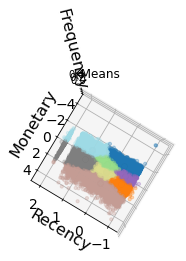

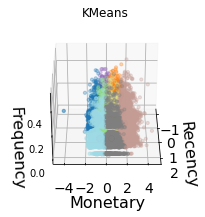

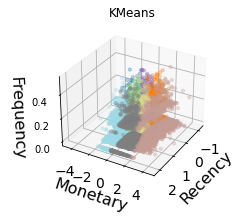

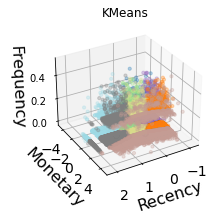

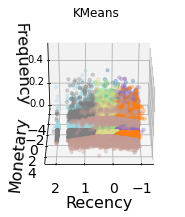

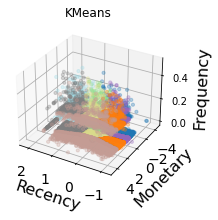

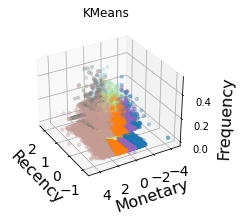

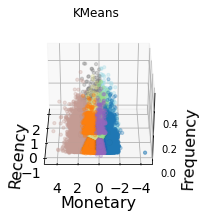

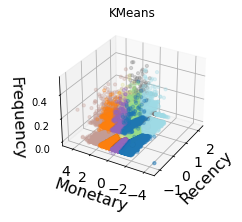

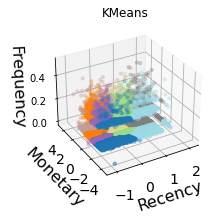

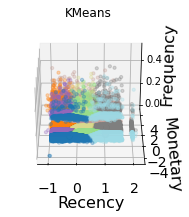

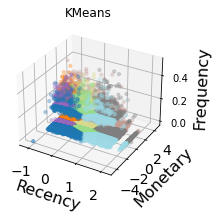

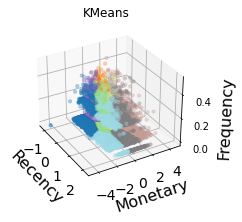

In [13]:
ploot("+r+m+f", elev=90)
pllot("+r+m+f", rot="azim")

Il n'arrive pas à différencier les F = 1 des F > 1. C'est très grave.

In [14]:
dfsc = pd.DataFrame(model.cluster_centers_)
xsc = dfsc[0]
ysc = dfsc[1]
zsc = dfsc[2]

In [15]:
def ttlng():
    plt.title("KMeans")
    plt.xlabel("R",fontsize=16)
    plt.xticks(fontsize=14)
    plt.ylabel("M",fontsize=16)
    plt.yticks(fontsize=14)
    ax.set_zlabel("F",fontsize=16)
#    ax.set_zticks(fontsize=14)

(0.0, 1.0)

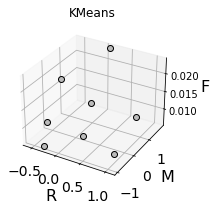

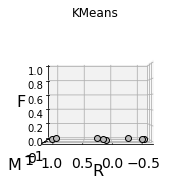

In [16]:
fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(projection='3d')
ax.plot(xsc,zsc,ysc,
        "o", markerfacecolor="#bbbbbb", markeredgecolor="k", markersize=6)
ttlng()

fig = plt.figure(figsize=(20, 3))
ax = fig.add_subplot(projection='3d')
ax.plot(xsc,zsc,ysc,
        "o", markerfacecolor="#bbbbbb", markeredgecolor="k", markersize=6)
ttlng()
ax.elev = 0
ax.azim = 90
ax.set_zlim(0,1)

On voit clairement que F est quasiment ignoré par ce KMeans.

>>-
## 2.3. Clustering linéaire

In [82]:
X[cols_num] = scalers[1].fit_transform(df[cols_num])

In [85]:
X.shape

(96095, 3)

In [83]:
sum(X.F == 0)

90366

In [86]:
pct = (1-sum(X.F == 0)/X.shape[0])*100

In [87]:
print("Il y a {a:.1f}% de clients ayant effectué plus d'un achat dans le dataset avant subsampling.".format(a=pct))

Il y a 6.0% de clients ayant effectué plus d'un achat dans le dataset avant subsampling.


>>>-
### 2.3.1. KMeans

In [18]:
model = KMeans(n_clusters=8, init="k-means++")
model = model.fit(X)
#y_pred = model.fit_predict(X)
y_pred = model.predict(X)

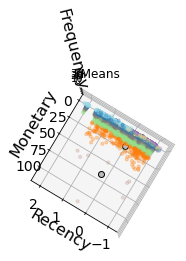

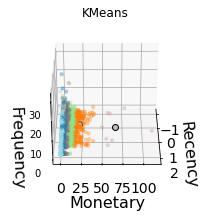

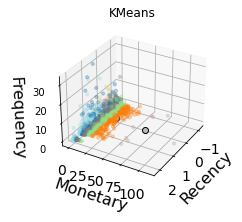

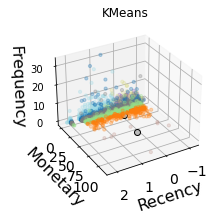

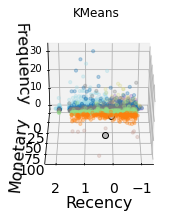

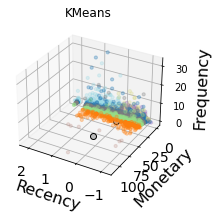

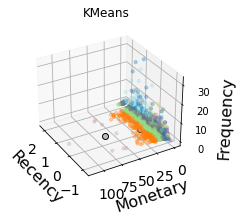

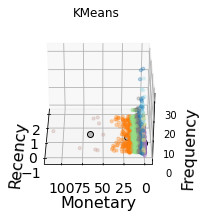

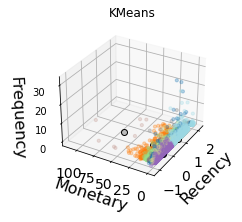

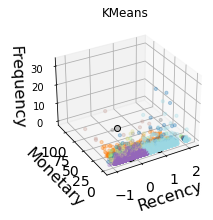

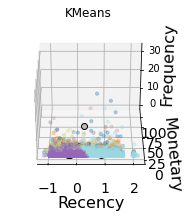

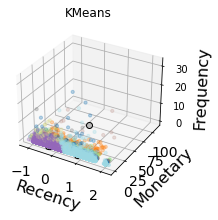

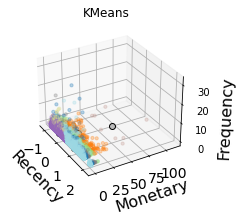

In [19]:
ploot("+r+m+f", elev=90)
pllot("+r+m+f", rot="azim")

Paradoxalement le clustering a l'air bien meilleur alors que les points sont tous condensés vers l'axe (F,M) = (0,0).

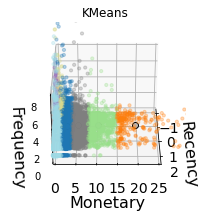

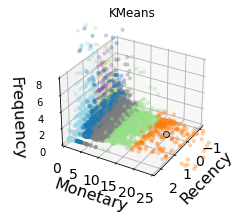

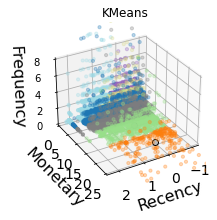

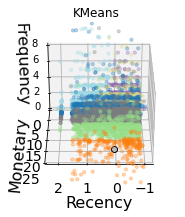

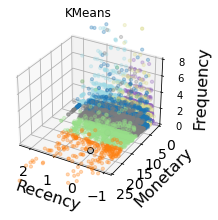

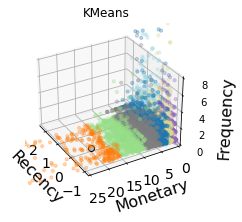

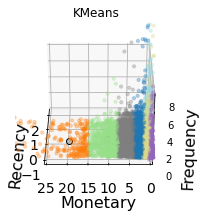

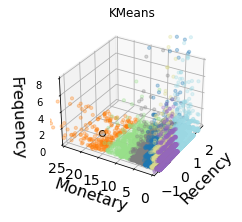

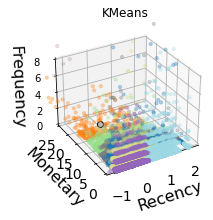

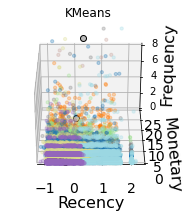

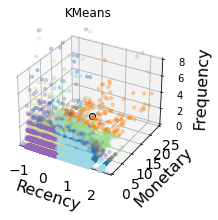

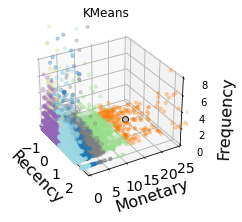

In [20]:
pllot("+r+m+f", rot="azim", lims=[-1.2,2.4,0,25,0,8])

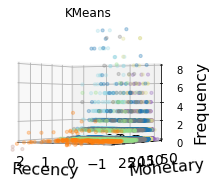

In [21]:
ploot("+r+m+f", elev=0, lims=[-1.2,2.4,0,25,0,8])

Le clustering ignore toujours les valeurs de F.  
Par ailleurs 3 à 5 clusters devraient suffire.

In [22]:
model = KMeans(n_clusters=4, init="k-means++")
model = model.fit(X)
#y_pred = model.fit_predict(X)
y_pred = model.predict(X)

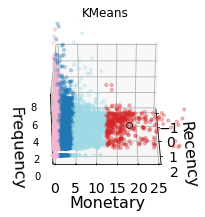

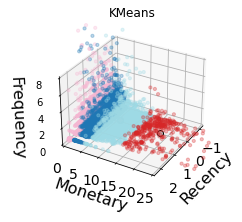

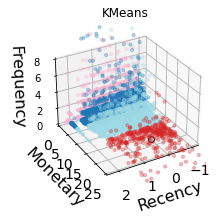

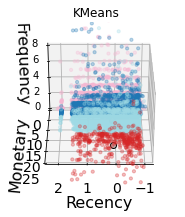

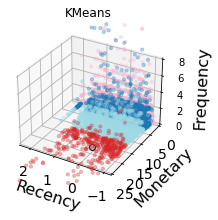

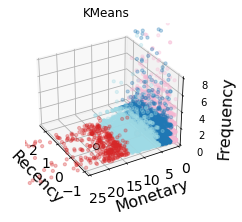

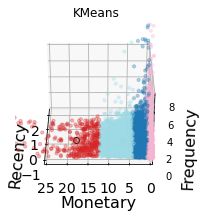

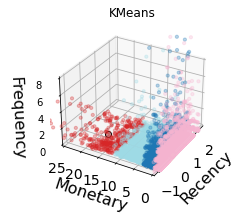

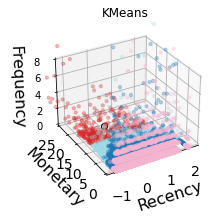

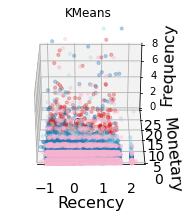

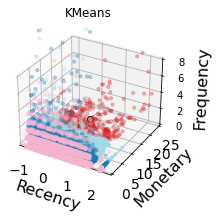

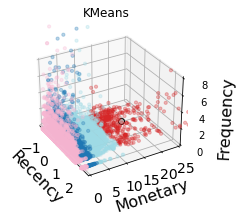

In [23]:
pllot("+r+m+f", rot="azim", lims=[-1.2,2.4,0,25,0,8])

>>>-
### 2.3.2. DBscan

check % F=1
sample
re-check
clustering
check que le groupe contenant tous les F=1 et uniquement des F=1 (s'il existe) représente encore une fois 97%.

>>>-
### 2.3.3. Agglomerative/hierarchical clustering

<function matplotlib.pyplot.legend(*args, **kwargs)>

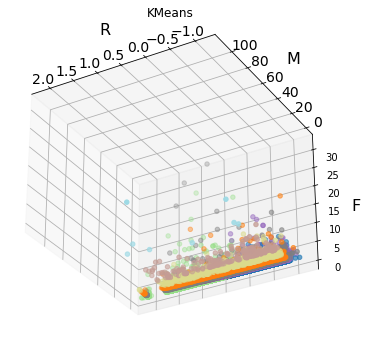

In [24]:
model = KMeans(n_clusters=8, init="k-means++")
model = model.fit(X)
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R,X.M,X.F, c=model.labels_, cmap="tab20")
plt.title("KMeans")
plt.xlabel("R",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("M",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("F",fontsize=16)
#ax.set_zticks(fontsize=14)
ax.elev = -30
ax.azim = 120
plt.legend


<function matplotlib.pyplot.legend(*args, **kwargs)>

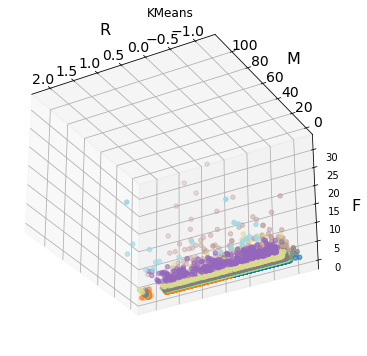

In [25]:
model = KMeans(n_clusters=8, init="random")
model = model.fit(X)
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R,X.M,X.F, c=model.labels_, cmap="tab20")
plt.title("KMeans")
plt.xlabel("R",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("M",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("F",fontsize=16)
#ax.set_zticks(fontsize=14)
ax.elev = -30
ax.azim = 120
plt.legend


<function matplotlib.pyplot.legend(*args, **kwargs)>

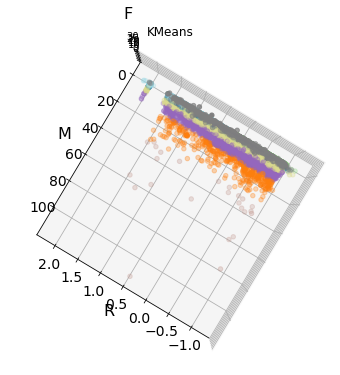

In [26]:
model = KMeans(n_clusters=8, init="random")
model = model.fit(X)
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R,X.M,X.F, c=model.labels_, cmap="tab20")
plt.title("KMeans")
plt.xlabel("R",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("M",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("F",fontsize=16)
#ax.set_zticks(fontsize=14)
ax.elev = 90
ax.azim = 120
plt.legend


In [27]:
model.cluster_centers_

array([[-3.79173591e-03,  5.37237067e-02,  1.18149654e+00],
       [ 8.39862130e-02,  1.30000000e-01,  1.65117980e+01],
       [-3.45750427e-01,  1.44872465e-03, -1.87464971e-01],
       [ 6.98670654e-02,  1.93333333e-01,  7.95424162e+00],
       [ 1.37379814e-01,  3.60000000e-01,  4.44997758e+01],
       [-6.05668984e-02,  1.55108929e+00,  1.97339080e-01],
       [ 8.98094249e-02,  1.59311087e-01,  3.59701581e+00],
       [ 8.35643500e-01,  2.40496801e-02, -1.17687960e-01]])

In [28]:
len(model.labels_)

96095

In [29]:
set(model.labels_)

{0, 1, 2, 3, 4, 5, 6, 7}

In [30]:
dfsc = pd.DataFrame(model.cluster_centers_)
xsc = dfsc[0]
ysc = dfsc[1]
zsc = dfsc[2]
ax.scatter(xsc,zsc,ysc, c="k")

(0.0, 1.0)

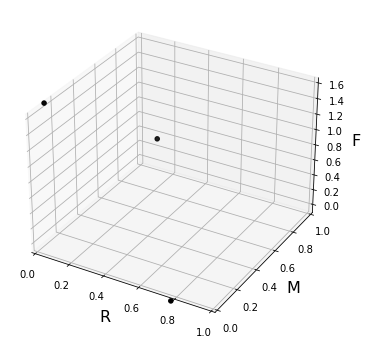

In [31]:

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(xsc,zsc,ysc, c="k")
plt.xlabel("R",fontsize=16)
plt.ylabel("M",fontsize=16)
ax.set_zlabel("F",fontsize=16)
plt.xlim(0,1)
plt.ylim(0,1)

(0.0, 1.0)

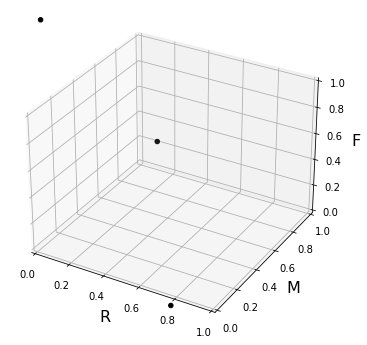

In [32]:

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(xsc,zsc,ysc, c="k")
plt.xlabel("R",fontsize=16)
plt.ylabel("M",fontsize=16)
ax.set_zlabel("F",fontsize=16)
plt.xlim(0,1)
plt.ylim(0,1)
ax.set_zlim(0,1)

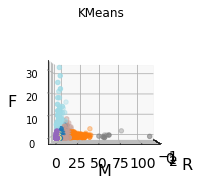

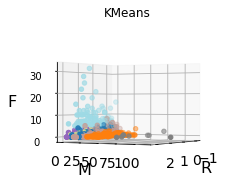

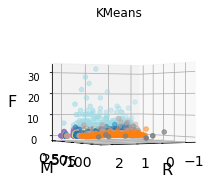

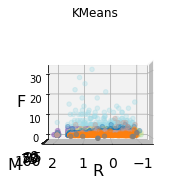

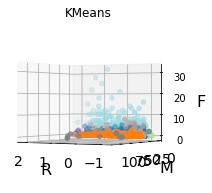

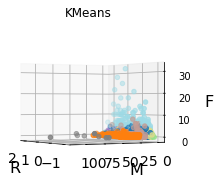

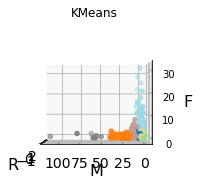

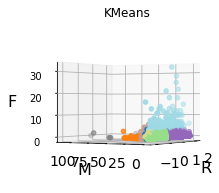

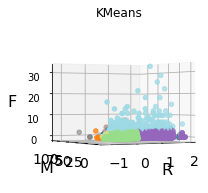

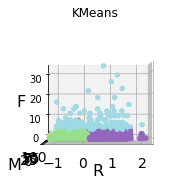

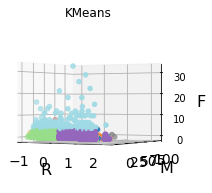

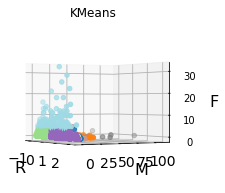

In [33]:
model = KMeans(n_clusters=8, init="k-means++")
model = model.fit(X)
for i in [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330]:
    fig = plt.figure(figsize=(20, 3))
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X.R,X.M,X.F, c=model.labels_, cmap="tab20")
    plt.title("KMeans")
    plt.xlabel("R",fontsize=16)
    plt.xticks(fontsize=14)
    plt.ylabel("M",fontsize=16)
    plt.yticks(fontsize=14)
    ax.set_zlabel("F",fontsize=16)
    #ax.set_zticks(fontsize=14)
    ax.elev = 0
    ax.azim = i
    plt.legend


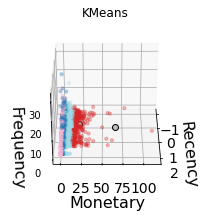

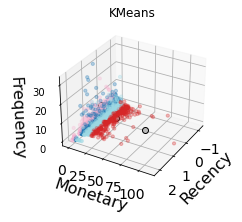

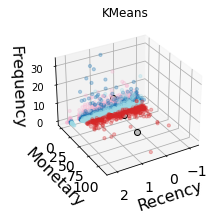

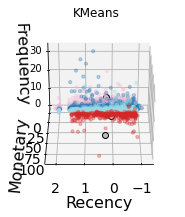

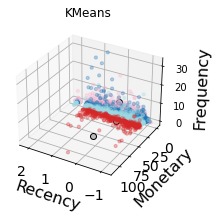

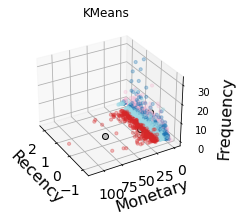

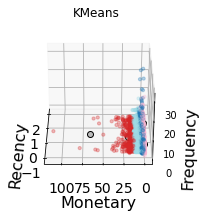

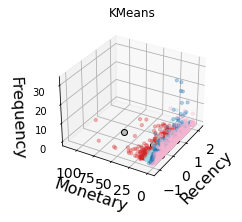

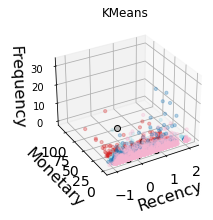

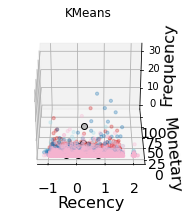

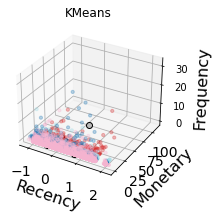

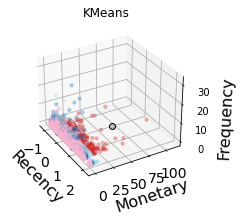

In [34]:
pllot("+r+m+f", rot="azim")

In [35]:
model = KMeans(n_clusters=5, init="k-means++")
y_pred = model.fit_predict(X)
#db = model.fit(X)
#set(db.labels_)

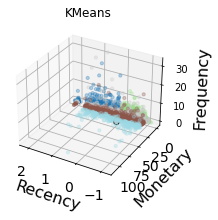

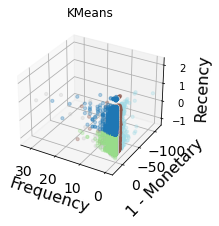

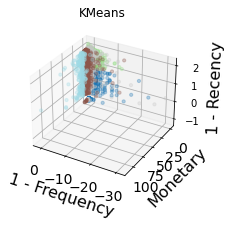

In [36]:
ploot("+r+m+f")
ploot("+f-m+r")
ploot("-f+m-r")

In [37]:
model = KMeans(n_clusters=8, init="k-means++")
y_pred = model.fit_predict(X)
#db = model.fit(X)
#set(db.labels_)

In [38]:
#from mpl_toolkits import mplot3d

In [39]:
#%matplotlib notebook

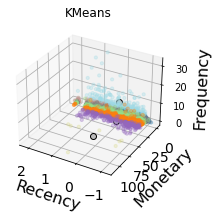

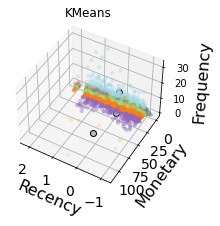

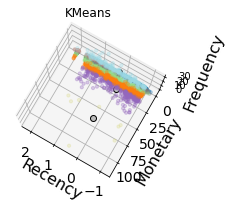

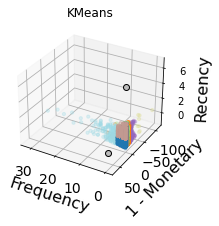

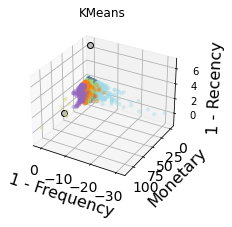

In [40]:
ploot("+r+m+f")
ploot("+r+m+f",120,45)
ploot("+r+m+f",120,80)
ploot("+f-m+r")
ploot("-f+m-r")


J'ai l'impression que ce clustering KMeans se fait uniquement dans le plan (R,M) et ne tient jamais compte des valeurs de F.

In [41]:
X[cols_num] = scalers[0].fit_transform(df[cols_num])

<function matplotlib.pyplot.legend(*args, **kwargs)>

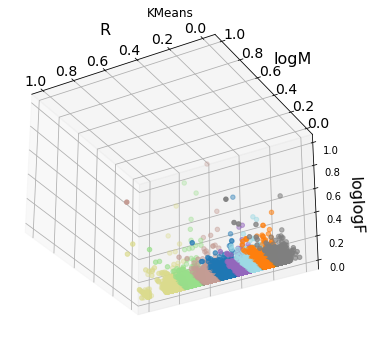

In [42]:
model = KMeans(n_clusters=8, init="k-means++")
model = model.fit(X)
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R,X.M,X.F, c=model.labels_, cmap="tab20")
plt.title("KMeans")
plt.xlabel("R",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("logM",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("loglogF",fontsize=16)
#ax.set_zticks(fontsize=14)
ax.elev = -30
ax.azim = 120
plt.legend


<function matplotlib.pyplot.legend(*args, **kwargs)>

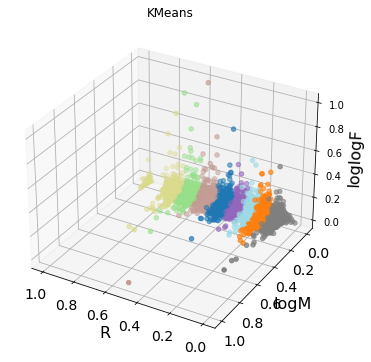

In [43]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R,X.M,X.F, c=model.labels_, cmap="tab20")
plt.title("KMeans")
plt.xlabel("R",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("logM",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("loglogF",fontsize=16)
#ax.set_zticks(fontsize=14)
ax.elev = 30
ax.azim = 120
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

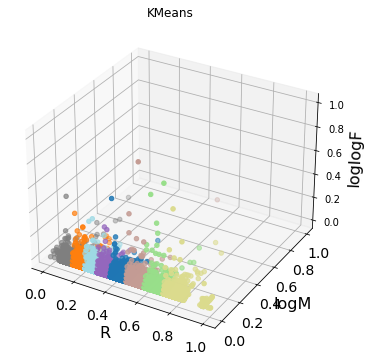

In [44]:

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R,X.M,X.F, c=model.labels_, cmap="tab20")
plt.title("KMeans")
plt.xlabel("R",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("logM",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("loglogF",fontsize=16)
#ax.set_zticks(fontsize=14)
ax.elev = 30
ax.azim = 300
plt.legend

In [45]:
xsc = pd.DataFrame(model.cluster_centers_)[0]
ysc = pd.DataFrame(model.cluster_centers_)[1]
zsc = pd.DataFrame(model.cluster_centers_)[2]

(0.0, 1.0)

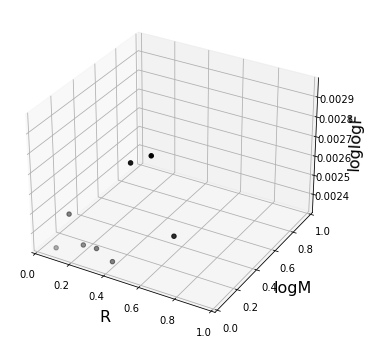

In [46]:

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(projection='3d')
ax.scatter(xsc,zsc,ysc, c="k")
plt.xlabel("R",fontsize=16)
plt.ylabel("logM",fontsize=16)
ax.set_zlabel("loglogF",fontsize=16)
plt.xlim(0,1)
plt.ylim(0,1)
#ax.set_zlim(0,1)

In [72]:
ns = 1000

In [47]:
X = X.sample(n=ns, weights=None, random_state=1) #frac=.1, weights="F", random_state=1)

In [71]:
sum(X.F == 0)

944

In [76]:
pct = (1-sum(X.F == 0)/ns)*100

In [79]:
print("Il y a {a:.1f}% de clients ayant effectué plus d'un achat dans ce subsampling.".format(a=pct))

Il y a 5.6% de clients ayant effectué plus d'un achat dans ce subsampling.


In [48]:
model = DBSCAN(eps=.3,min_samples=10)

In [49]:
#db = DBSCAN(eps=.3,min_samples=10).fit(X)
db = model.fit(X)

In [50]:
db.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [51]:
db.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [52]:
np.zeros_like(db.labels_, dtype=bool)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [53]:
set(db.labels_)

{0}

In [54]:
model = DBSCAN(eps=.3,min_samples=3)
db = model.fit(X)
set(db.labels_)

{0}

In [55]:
model = DBSCAN(eps=.3,min_samples=1)
db = model.fit(X)
set(db.labels_)

{0}

In [56]:
model = DBSCAN(eps=.3,min_samples=2)
db = model.fit(X)
set(db.labels_)

{0}

In [57]:
model = DBSCAN(eps=.1,min_samples=2)
y_pred = model.fit_predict(X)
db = model.fit(X)
set(db.labels_)

{0, 1, 2}

In [58]:
X

,R,F,M
44461,0.215907,0.00000,0.005706
40668,0.192622,0.00000,0.001308
72100,0.787929,0.03125,0.003257
73855,0.356205,0.00000,0.012764
17996,0.072249,0.00000,0.001492
...,...,...,...
16366,0.586501,0.00000,0.003566
91664,0.220002,0.00000,0.018524
80475,0.553509,0.00000,0.004142
52988,0.256009,0.00000,0.010891


<function matplotlib.pyplot.legend(*args, **kwargs)>

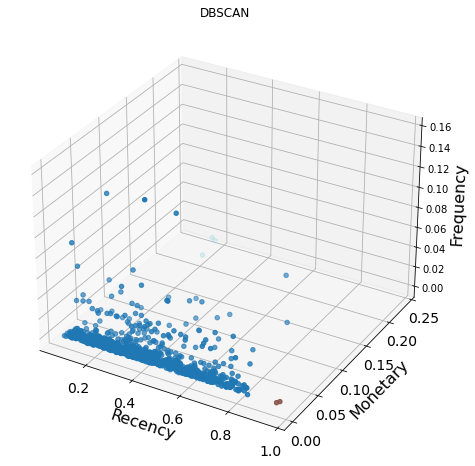

In [59]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R, X.M, X.F, c=y_pred, cmap="tab20")
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("Frequency",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

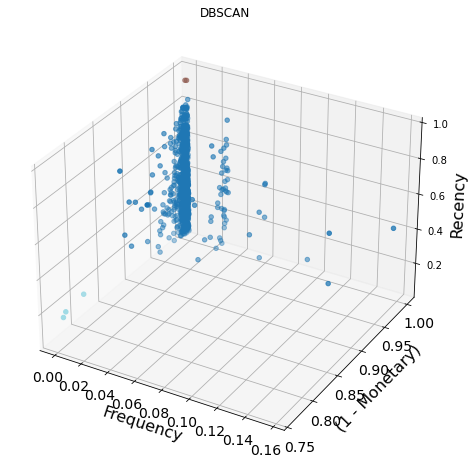

In [60]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.F, (1-X.M), X.R, c=y_pred, cmap="tab20")
plt.title("DBSCAN")
plt.xlabel("Frequency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("(1 - Monetary)",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("Recency",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

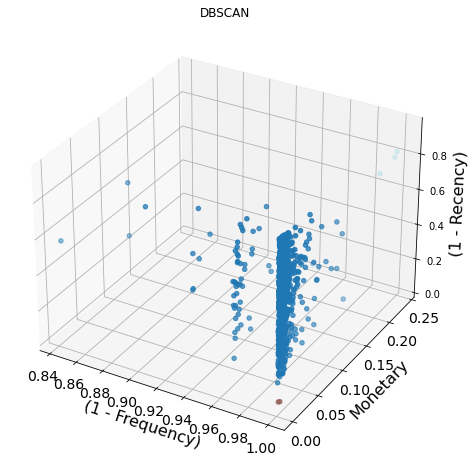

In [61]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter((1-X.F), X.M, (1-X.R), c=y_pred, cmap="tab20")
plt.title("DBSCAN")
plt.xlabel("(1 - Frequency)",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("(1 - Recency)",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

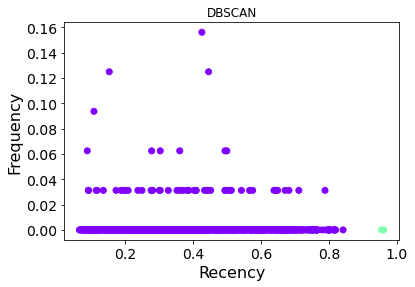

In [62]:
plt.scatter(X.R, X.F, c=y_pred, cmap=cmaps[5])
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Frequency",fontsize=16)
plt.yticks(fontsize=14)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

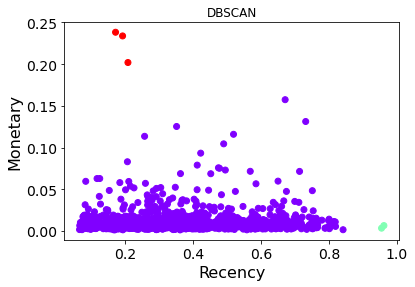

In [63]:
plt.scatter(X.R, X.M, c=y_pred, cmap=cmaps[5])
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
plt.legend

<function matplotlib.pyplot.legend(*args, **kwargs)>

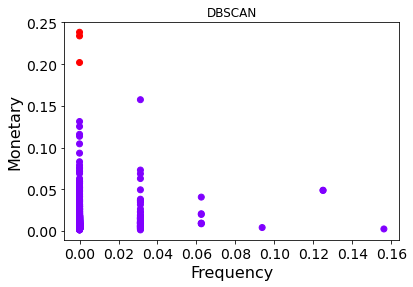

In [64]:
plt.scatter(X.F, X.M, c=y_pred, cmap=cmaps[5])
plt.title("DBSCAN")
plt.xlabel("Frequency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
plt.legend

In [65]:
plot les db.label_ == 1 par exemple (voir la syntaxe)

SyntaxError: invalid syntax (4222313584.py, line 1)

In [ ]:
model = DBSCAN(eps=1,min_samples=2)
db = model.fit(X)
set(db.labels_)

In [ ]:
model = DBSCAN(eps=10,min_samples=2)
db = model.fit(X)
set(db.labels_)

In [ ]:
model = DBSCAN(eps=5,min_samples=5)
db = model.fit(X)
set(db.labels_)

In [ ]:
model = KMeans(n_clusters=5, init="k-means++")
y_pred = model.fit_predict(X)
db = model.fit(X)
set(db.labels_)

In [ ]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R, X.M, X.F, c=y_pred, cmap="tab20")
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("Frequency",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

Pas terrible. Il a juste mis un centroïde à chaque coin.

In [ ]:
model = KMeans(n_clusters=3, init="k-means++")
y_pred = model.fit_predict(X)
db = model.fit(X)
set(db.labels_)

In [ ]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R, X.M, X.F, c=y_pred, cmap="tab20")
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("Frequency",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

Pas terrible. Il a juste aligné 3 centroïdes sur l'axe Monetary=.5.

In [ ]:
model = AgglomerativeClustering(n_clusters=5)
y_pred = model.fit_predict(X)
db = model.fit(X)
set(db.labels_)

In [ ]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R, X.M, X.F, c=y_pred, cmap="tab20")
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("Frequency",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

Même problème qu'avec KMeans.

In [ ]:
model = AgglomerativeClustering(n_clusters=3)
y_pred = model.fit_predict(X)
db = model.fit(X)
set(db.labels_)

In [ ]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X.R, X.M, X.F, c=y_pred, cmap="tab20")
plt.title("DBSCAN")
plt.xlabel("Recency",fontsize=16)
plt.xticks(fontsize=14)
plt.ylabel("Monetary",fontsize=16)
plt.yticks(fontsize=14)
ax.set_zlabel("Frequency",fontsize=16)
#ax.set_zticks(fontsize=14)
plt.legend

Même problème qu'avec KMeans.